In [5]:
# Import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [6]:
# Load the dataset
file_path = 'Monthly_house_rental_prices_in_Sri_Lanka.csv'
df = pd.read_csv(file_path)

In [7]:
# Viewing the first ten rows of the dataset
df.head(10)

,Title,District,Address,Beds,Baths,House size,Land size,Price
0,House for Rent in Galigamuwa,Kegalle,"Udahawatta, Asideniya, Galigamuwa Town",4,2,2720.0 sqft,160.0 perches,"Rs 33,000"
1,House for Rent in Matale,Matale,"Matale City, Matale",3,2,"2,300.0 sqft",25.0 perches,"Rs 37,000"
2,House for Rent in Matale,Matale,"pallepola, matale",2,1,600.0 sqft,10.0 perches,"Rs 16,000"
3,House Rent Colombo,Colombo,Nugegoda.,3,1,"1,000.0 sqft",23.0 perches,"Rs 40,000"
4,House for Rent in Nuwaraeliya,Nuwara Eliya,Nuwara Eliya City,2,1,700.0 sqft,10.0 perches,"Rs 20,000"
5,House for Rent Puttalam,Puttalam,"Puttalam City, Puttalam",3,2,"2,300.0 sqft",25.0 perches,"Rs 37,000"
6,House For Rent In Hambantota,Hambantota,"Mayurapura, Hambantota",2,1,1200.0 sqft,12.0 perches,"Rs 20,000"
7,House for Rent in Polonnaruwa,Polonnaruwa,"Jayanthipura, Polonnaruwa",3,1,"2,200.0 sqft",22.0 perches,"Rs 32,000"
8,House Rent Colombo,Colombo,Baththaramulla,2,1,"1,178.0 sqft",8.0 perches,"Rs 35,000"
9,Upstair House For Rent In Rathnapura Eheliyagoda,Ratnapura,"Rathnapura, Eheliyagoda",2,1,"1,350.0 sqft",10.0 perches,"Rs 23,000"


In [8]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Title', 'Address'])

In [9]:
# After dropping the 'Title' and 'Address' columns, view the first five rows of the dataset

df_cleaned.head()

,District,Beds,Baths,House size,Land size,Price
0,Kegalle,4,2,2720.0 sqft,160.0 perches,"Rs 33,000"
1,Matale,3,2,"2,300.0 sqft",25.0 perches,"Rs 37,000"
2,Matale,2,1,600.0 sqft,10.0 perches,"Rs 16,000"
3,Colombo,3,1,"1,000.0 sqft",23.0 perches,"Rs 40,000"
4,Nuwara Eliya,2,1,700.0 sqft,10.0 perches,"Rs 20,000"


In [10]:
# Convert 'Price' to a numeric value by removing 'Rs' and commas
df_cleaned['Price'] = df_cleaned['Price'].str.replace('Rs', '').str.replace(',', '').astype(float)

In [11]:
df_cleaned.head()

,District,Beds,Baths,House size,Land size,Price
0,Kegalle,4,2,2720.0 sqft,160.0 perches,33000.0
1,Matale,3,2,"2,300.0 sqft",25.0 perches,37000.0
2,Matale,2,1,600.0 sqft,10.0 perches,16000.0
3,Colombo,3,1,"1,000.0 sqft",23.0 perches,40000.0
4,Nuwara Eliya,2,1,700.0 sqft,10.0 perches,20000.0


In [12]:
# Extract numeric values from 'Land size'

df_cleaned['Land size'] = df_cleaned['Land size'].str.extract('(\d+\.?\d*)').astype(float)

In [13]:
df_cleaned.head()

,District,Beds,Baths,House size,Land size,Price
0,Kegalle,4,2,2720.0 sqft,160.0,33000.0
1,Matale,3,2,"2,300.0 sqft",25.0,37000.0
2,Matale,2,1,600.0 sqft,10.0,16000.0
3,Colombo,3,1,"1,000.0 sqft",23.0,40000.0
4,Nuwara Eliya,2,1,700.0 sqft,10.0,20000.0


In [14]:
# Extract numeric values from 'House size'
df_cleaned['House size'] = df_cleaned['House size'].str.replace(',', '').str.extract('(\d+\.?\d*)').astype(float)

In [15]:
df_cleaned.head()

,District,Beds,Baths,House size,Land size,Price
0,Kegalle,4,2,2720.0,160.0,33000.0
1,Matale,3,2,2300.0,25.0,37000.0
2,Matale,2,1,600.0,10.0,16000.0
3,Colombo,3,1,1000.0,23.0,40000.0
4,Nuwara Eliya,2,1,700.0,10.0,20000.0


In [16]:
# Define features and target variable

features = df_cleaned[['Baths', 'Beds', 'Land size', 'House size', 'District']]
target = df_cleaned['Price']

In [17]:
# Get the list of known districts for validation
known_districts = df_cleaned['District'].unique().tolist()

In [18]:
#list of districts
known_districts

['Kegalle',
 'Matale',
 'Colombo',
 'Nuwara Eliya',
 'Puttalam',
 'Hambantota',
 'Polonnaruwa',
 'Ratnapura',
 'Trincomalee',
 'Matara',
 'Monaragala',
 'Gampaha',
 'Ampara',
 'Kalutara',
 'Jaffna',
 'Galle',
 'Anuradhapura',
 'Kurunegala',
 'Kandy',
 'Badulla']

In [19]:
# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
# Define a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Baths', 'Beds', 'Land size', 'House size']),
        ('cat', OneHotEncoder(), ['District'])
    ]
)

In [21]:
# Import model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

In [23]:
# Experimenting with Alternative Models
# Import model libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [24]:
# Define multiple models for experimentation
models = {
    'XGBRegressor': XGBRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5)
}

In [25]:
# Import metrics libraries
from sklearn.metrics import mean_absolute_error, r2_score

# Train and evaluate each model
for name, model in models.items():
    from sklearn.pipeline import Pipeline

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy_percentage = r2 * 100

    # Print evaluation metrics for each model
    print(f"{name} Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print(f"Model Accuracy: {accuracy_percentage:.2f}%\n")

XGBRegressor Evaluation Metrics:
Mean Absolute Error (MAE): 2045.72138671875
R-squared (R²): 0.9251243146921633
Model Accuracy: 92.51%

LinearRegression Evaluation Metrics:
Mean Absolute Error (MAE): 2931.3130308244467
R-squared (R²): 0.868468691868377
Model Accuracy: 86.85%

RandomForest Evaluation Metrics:
Mean Absolute Error (MAE): 2077.133333333333
R-squared (R²): 0.9075618798318564
Model Accuracy: 90.76%

KNeighbors Evaluation Metrics:
Mean Absolute Error (MAE): 3186.0
R-squared (R²): 0.8308900892135112
Model Accuracy: 83.09%



In [26]:
# Cross-Validation

# Perform 5-fold cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    scores = cross_val_score(pipeline, features, target, cv=5, scoring='r2')

    # Print cross-validation scores
    print(f"{name} Cross-Validation R² Scores: {scores}")
    print(f"{name} Average R² Score: {np.mean(scores)}\n")


XGBRegressor Cross-Validation R² Scores: [0.9021822  0.91085931 0.9318097  0.90812538 0.93161014]
XGBRegressor Average R² Score: 0.9169173449044594

LinearRegression Cross-Validation R² Scores: [0.86437172 0.8467468  0.87807743 0.89130065 0.86879244]
LinearRegression Average R² Score: 0.8698578074112924

RandomForest Cross-Validation R² Scores: [0.86787883 0.89863973 0.93316913 0.89299986 0.90649475]
RandomForest Average R² Score: 0.8998364591826087

KNeighbors Cross-Validation R² Scores: [0.83123402 0.76613631 0.84862297 0.84571134 0.8303135 ]
KNeighbors Average R² Score: 0.8244036282706132



In [27]:
# Hyperparameter Tuning (XGBRegressor) here, we can choose based on cross-validation results)

# Define the parameter grid for XGBRegressor
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}


In [28]:
# Create a pipeline with XGBRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

In [29]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Baths',
                                                                          'Beds',
                                                                          'Land '
                                                                          'size',
                                                                          'House '
                                                                          'size']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['District'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     earl...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [50, 100, 200]},
             scoring='r2')

In [30]:
# Print the best parameters and score
print("Best Parameters for XGBRegressor:", grid_search.best_params_)
print("Best R² Score from GridSearchCV:", grid_search.best_score_)

Best Parameters for XGBRegressor: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200}
Best R² Score from GridSearchCV: 0.9160961537004905


In [31]:
# Predict on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

In [32]:
# Final evaluation with the tuned model

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100

In [33]:
# Print final evaluation metrics after tuning
print(f"Final Model (XGBRegressor) Evaluation After Hyperparameter Tuning:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Final Model (XGBRegressor) Evaluation After Hyperparameter Tuning:
Mean Absolute Error (MAE): 2027.2582682291666
R-squared (R²): 0.9246159408306522
Model Accuracy: 92.46%


In [34]:
# Visualization
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

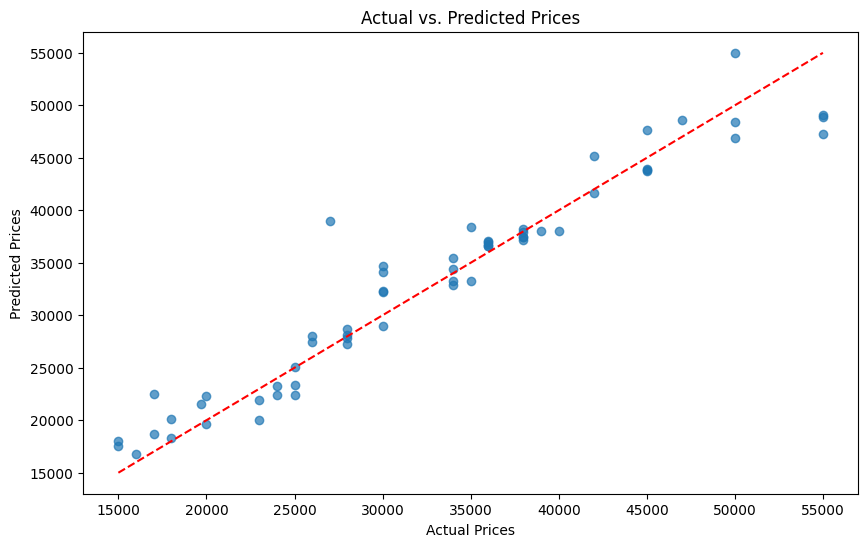

In [35]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

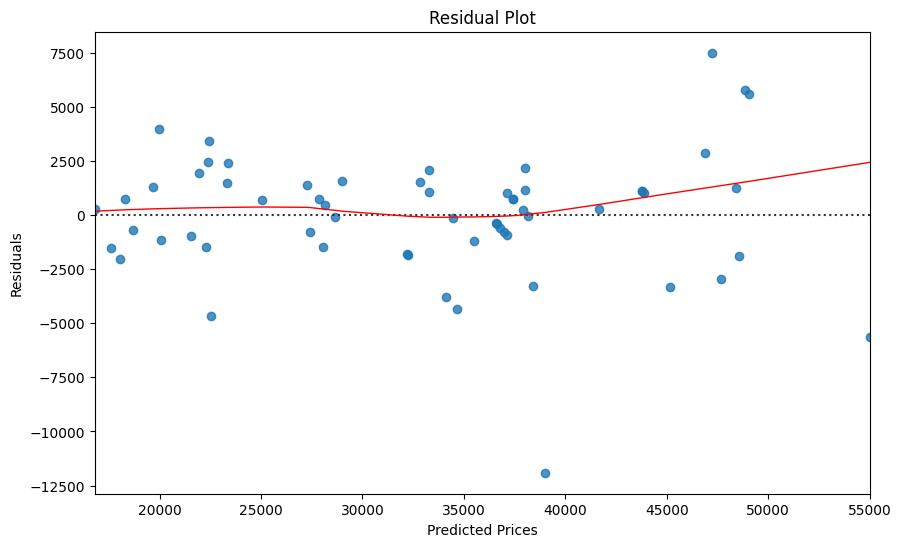

In [36]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

In [37]:
# Model Saving and Loading
# Import joblib for saving and loading models
import joblib

In [38]:
# Save the best model from GridSearchCV
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [39]:
# Load the model
loaded_model = joblib.load('best_model.pkl')

In [40]:
# Function to predict rental price for new data
def predict_rental_price(baths, beds, land_size, house_size, district):
    # Normalize the district name to title case for comparison
    normalized_district = district.title()

    # Check if the location (district) is in the known districts
    if normalized_district not in known_districts:
        raise ValueError(f"Undefined District: '{district}' does not match any known district in the training data.")

    # Create a DataFrame for the new input
    new_data = pd.DataFrame([[baths, beds, land_size, house_size, normalized_district]],
                            columns=['Baths', 'Beds', 'Land size', 'House size', 'District'])

    # Make prediction using the loaded model (it handles both scaling and encoding)
    predicted_price = loaded_model.predict(new_data)

    return predicted_price[0]

In [42]:
# Example usage for prediction
try:
    baths = 2
    beds = 2
    land_size = 11.0
    house_size = 1200.0
    district = "Nuwara Eliya"
    predicted_price = predict_rental_price(baths, beds, land_size, house_size, district)

    print(f"Predicted Price Rs: {predicted_price}")
except ValueError as e:
    print(e)

Predicted Price Rs: 27563.458984375
